<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-и-преобразование-типов-данных" data-toc-modified-id="Обработка-пропусков-и-преобразование-типов-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка пропусков и преобразование типов данных</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-продаж-игр" data-toc-modified-id="Количество-продаж-игр-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество продаж игр</a></span></li><li><span><a href="#Перспективные-платформы-и-актуальный-период" data-toc-modified-id="Перспективные-платформы-и-актуальный-период-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Перспективные платформы и актуальный период</a></span></li><li><span><a href="#Влияние-оценок-критиков-и-пользователей" data-toc-modified-id="Влияние-оценок-критиков-и-пользователей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Влияние оценок критиков и пользователей</a></span></li><li><span><a href="#Жанры" data-toc-modified-id="Жанры-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Жанры</a></span></li><li><span><a href="#Регионы" data-toc-modified-id="Регионы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Регионы</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование исторических данных о продажах игр, оценках пользователей и экспертов, жанров и платфортформ.

---
**Цель исследования:**

> 1. Выявить определяющие успешность игры закономерности
 
> Данные я получу из файла '/datasets/games.csv'. О качестве данных неизвестно, поэтому прежде чем формировать какие-то выводы и приступать к цели исследования. Нужен обзор данных.

> Я проверю все данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению результата. Далее, составлю портрет пользователя каждого региона, проверю выдвинутые гипотезы, и приступлю к цели исследования.

> Таким образом исследование пройдет в семь этапов:
1. Обзор данных 
2. Предобработка данных
3. Расчеты и добавление результатов в таблицу
4. Проведение анализа для платформ 
5. Проведение анализа для регионов
6. Проверка гипотез
7. Конечный вывод исследования




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv',)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


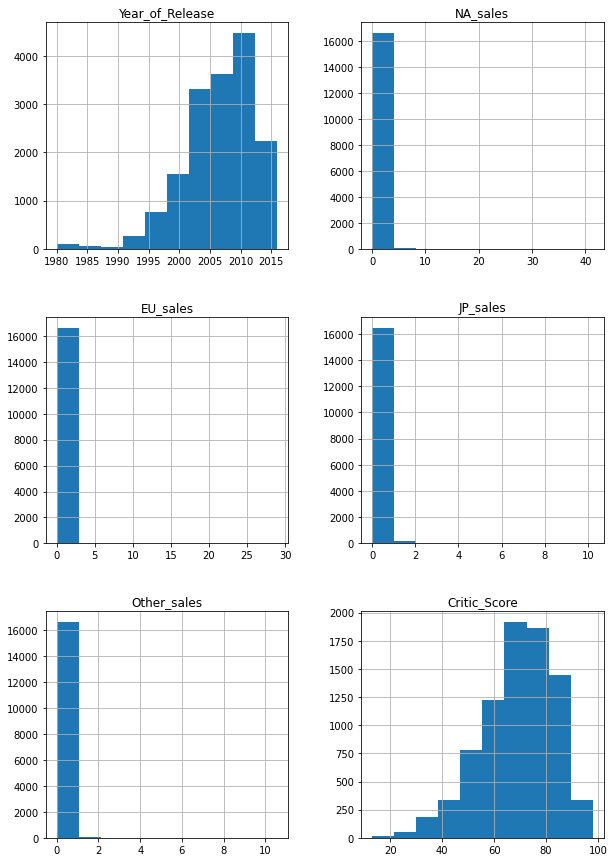

In [4]:
df.hist(figsize=(10, 15));
plt.show()

**Промежуточный вывод**
<br>
На первый взгляд видно, что нарушены типы данных, некорректное название столбцов и пропуски в столбца оценки критиков, оценки пользователей и рейтинге.

## Предобработка данных

Для начала приведем столбцы к нижнему регистру.

In [5]:
df = df.rename(columns = {'Name': 'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

Я не стал менять регистр столбцов NA_sales, JP_sales, EU_Sales, потому что это аббревиатуры.

### Обработка пропусков и преобразование типов данных

In [6]:
df.isna().sum()
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропусков не очень много. Чтобы сэкономить время если пропусков 5-10% просто их удалим.

**Год выхода**

---


In [7]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Нужно привести данные к целочисленному значению

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [9]:
df.dropna(subset=['year_of_release'],inplace=True,axis='index')

In [10]:
df['year_of_release'].sort_values()

1764     1980
546      1980
1968     1980
6300     1980
6875     1980
         ... 
15198    2016
15210    2016
10371    2016
12352    2016
16714    2016
Name: year_of_release, Length: 16446, dtype: Int64

**Оценки критиков**

---
Пропусков больше 50%, значит простое удаление пропусков приведет к тому, что огромная часть информации потеряется. Возможно, что пропуски появлились из-за обычного отсутствия оценки критиков. Причин отсутсвия множество, но я выделил пару основных:

1.   Проект в бета-тестировании
2.   Проект недавно вышел

> В итоге приходим к выводу, что пропуски удалять нельзя. Можно просто оставить пропуски, или же заменить пропуски на "Отсутсвие оценки"





In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Также приведем значения к целому числу. Шкала оценки широкая, поэтому дробные значения ни к чему

In [12]:
df['critic_score'] = df['critic_score'].astype('int64', errors='ignore')

**Оценка пользователей**

---
С пользователями ситуация похожая. Единственное, что стоит отметить - шкала оценивания пользователей. Пользователи оценивают игру по 10 бальной шкале, поэтому дробные значения это нормально.


In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение tbd - To Be Determined. Будет определено. Это означает, что оценки нет, поэтому заменим tbd на nan

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Преобразуем тип данных в float

In [15]:
df['user_score'] = df['user_score'].astype('float')

**Рейтинг**

---



In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменить пропуски не получится, поэтому оставим nan

### Устранение дубликатов

Удалим явные дубликаты

In [17]:
df.duplicated().sum()
df = df.drop_duplicates()

Произведем проверку на неявные дубликаты

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [19]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [20]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

EC, K-A, AO, RP. Занимают как раз пренебрежимо малую долю в данных, поэтому просто удалим их.

In [23]:
df.drop(index=df.query('["EC","K-A","AO","RP"] in rating').index,inplace=True)

Неявных дубликатов нет 

**total_sales**

---

Посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец total_sales

In [25]:
df['total_sales'] = df['EU_sales'] + df['JP_sales'] + df['NA_sales'] + df['other_sales']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16433 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16433 non-null  object 
 2   year_of_release  16433 non-null  Int64  
 3   genre            16431 non-null  object 
 4   NA_sales         16433 non-null  float64
 5   EU_sales         16433 non-null  float64
 6   JP_sales         16433 non-null  float64
 7   other_sales      16433 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7457 non-null   float64
 10  rating           9755 non-null   object 
 11  total_sales      16433 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [27]:
df.dropna(subset=['genre'],inplace=True,axis='index')
df.dropna(subset=['name'],inplace=True,axis='index')

**Вывод по предобработке данных**

---


*   Название столбцов приведены к нижнему регистру (кроме EU_sales, JP_sales, NA_sales)
* Изменены типы данных в столбцах: year_of_release, critic_score, user_score.
* Добавлен столбец с суммарным количеством продаж по всем регионам (total_sales)
* Произведена работа с пропусками
* В столбце user_score оценка 'tbd' была заменена на nan
* Выполнены проверки с последующим удалением явных и неявных дубликатов.






## Исследовательский анализ данных

Проверим датафрейм на выбросы

In [28]:
df.describe()

,year_of_release,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,total_sales
count,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,7980.000000,7457.000000,16431.000000
mean,2006.486763,0.263896,0.145984,0.078460,0.047617,68.989223,7.125774,0.535956
std,5.875814,0.818499,0.506893,0.311029,0.188077,13.917537,1.499745,1.559229
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


### Количество продаж игр

Посмотрим сколько игр выпускалось по годам. Для этого возьмем данные с 2012-2016 года.

In [29]:
df_actual = df.loc[df['year_of_release'] > 2011]

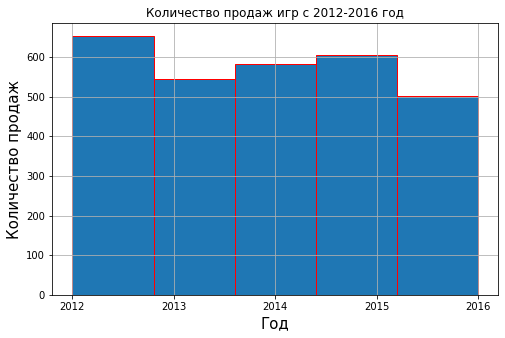

In [30]:
df_actual['year_of_release'].hist(bins=5,figsize=(8,5),ec='red')
plt.xlabel('Год',fontsize=15)
plt.ylabel('Количество продаж',fontsize=15)
plt.grid(True)
plt.xticks(np.arange(2012,2017,1))
plt.title('Количество продаж игр с 2012-2016 год')
plt.show()

Продажи игр в течении 5 лет держаться в районе 500-600 млн в год.

### Перспективные платформы и актуальный период

In [31]:
actual_period = df_actual.pivot_table(index=['platform'],
values='total_sales',
aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)

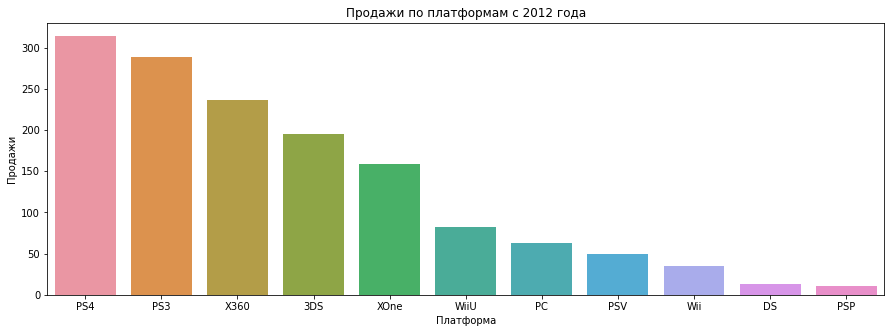

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(data = actual_period, x='platform',y='total_sales',ci=None);
plt.title('Продажи по платформам с 2012 года');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
plt.show()
#вариант ниже, я написал для себя. он не такой красочный
#df_actual.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).plot(y='total_sales', kind='bar')

Основываясь на этом графике отберем 5 лидирующих по продажам платформ

In [33]:
top_5 = df_actual.query('["PS4","PS3","XOne","X360","3DS"] in platform')

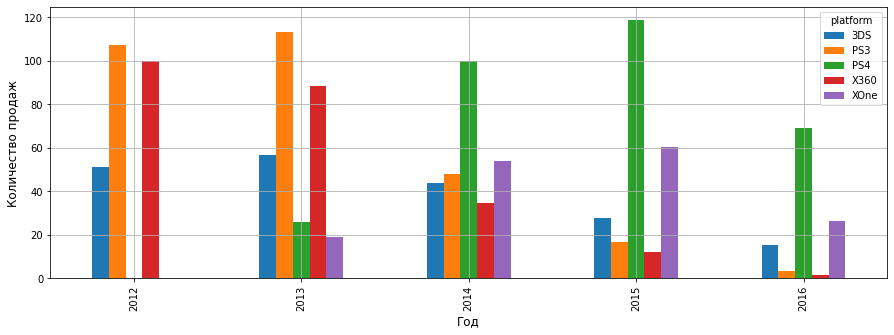

In [34]:
top_5.pivot_table(index='year_of_release',
                      columns='platform',
                      values='total_sales',
                      aggfunc='sum').plot(grid=True,figsize=(15,5),kind='bar',)
plt.xlabel('Год',fontsize=12)
plt.ylabel('Количество продаж',fontsize=12)                     
plt.show()

По графику видно, что средняя продолжительность "жизни" платформ длится 5-6 лет. Пик продаж приходится на 2-3 год после выпуска на рынок платформы, потом идет снижение продаж. В итоге **актуальный период** - 5-6 лет 

На 2016 год по продажам лидируют PS4, и его прямой конкурент - Xbox One. Это 2 потенциально прибильные платформы, которые вышли соверешенно недавно. Также у этих платформ есть потенциал для роста.

> На графике видно как платформы достигли пиков на 2-3 году существовании на рынке, но продажи у PS4 выше, наверное из-за количества эксклюзивных игр, которые выпускаются именно для PS4.



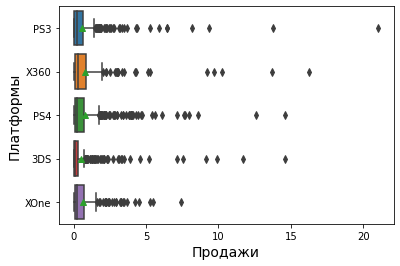

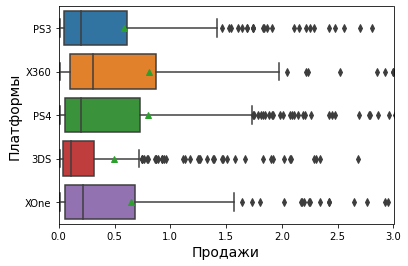

In [35]:
total_sales = top_5['total_sales']
platform = top_5['platform']
boxplot = sns.boxplot(x=total_sales, y=platform,showmeans = True)
boxplot.set_xlabel("Продажи", fontsize=14)
boxplot.set_ylabel("Платформы", fontsize=14)
plt.show()

total_sales = top_5['total_sales']
platform = top_5['platform']
boxplot = sns.boxplot(x=total_sales, y=platform,showmeans = True)
boxplot.set_xlabel("Продажи", fontsize=14)
boxplot.set_ylabel("Платформы", fontsize=14)
plt.xlim(0,3)
plt.show()

По графикам видно, что на данный момент в продажах лидируют X360 и PS3, а их младшие браться XOne и PS4 отстают, но это и не удивительно, потому что они относительно недавно вышли. 
<br />
Самые маленькие продажи, судя по медианному значению, у Nintendo 3DS

In [36]:
ps4 = df_actual.query('platform == "PS4"')

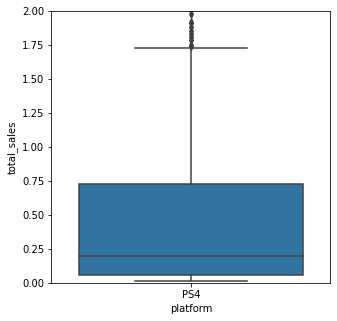

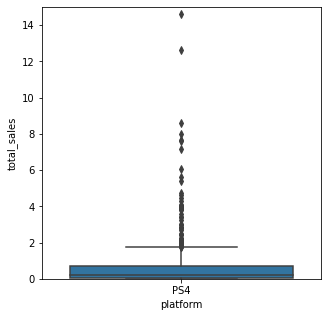

In [37]:
plt.figure(figsize=(5,5))
plt.ylim(0,2)
sns.boxplot(data= ps4,
            x='platform',
            y='total_sales',
            )
plt.figure(figsize=(5,5))
plt.ylim(0,15)
sns.boxplot(data= ps4,
            x='platform',
            y='total_sales',
            )
plt.show()

На графиках видно, что выбросы начинаются после достижения 1.75 млн. продаж

In [38]:
ps4.describe()

,year_of_release,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.459481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.000000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [39]:
XOne = df_actual.query('platform == "XOne"')

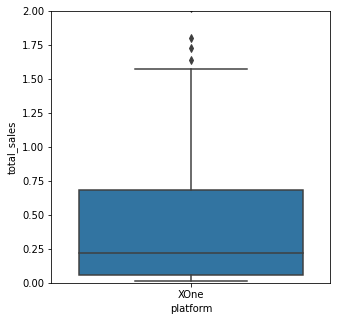

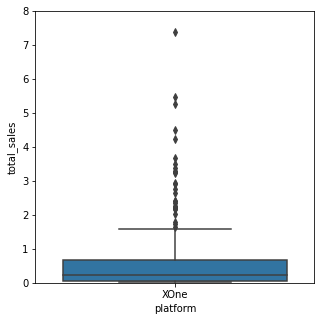

In [40]:
plt.figure(figsize=(5,5))
plt.ylim(0,2)
sns.boxplot(data= XOne,
            x='platform',
            y='total_sales',
            )
plt.figure(figsize=(5,5))
plt.ylim(0,8)
sns.boxplot(data= XOne,
            x='platform',
            y='total_sales',
            )
plt.show()

In [41]:
XOne.describe()

,year_of_release,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


С Xbox One ситуация другая. Выбросы начинаются после достижения значения в 1.6 млн. продаж

### Влияние оценок критиков и пользователей

**PS4**

In [42]:
list_for_graph = ['user_score','critic_score']

for entry in list_for_graph:
    correlation = ps4['total_sales'].corr(ps4[entry])
    print(f'Корреляция между total_sales и {entry} для PS4 составляет: {correlation:0.2}')

Корреляция между total_sales и user_score для PS4 составляет: -0.032
Корреляция между total_sales и critic_score для PS4 составляет: 0.41


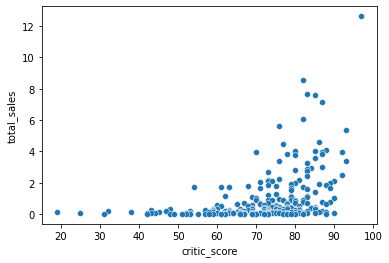

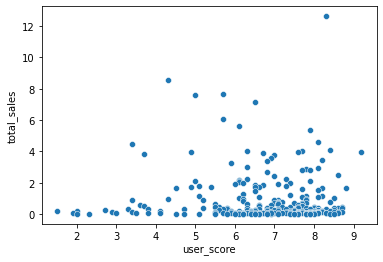

In [43]:
sns.scatterplot(data=ps4, x="critic_score", y="total_sales");
plt.show()
sns.scatterplot(data=ps4, x="user_score", y="total_sales")
plt.show()

>Корреляция между total_sales и user_score слабая отрицательная. Высокие оценки пользователей слабо влияют на продаваемость игры.

>Корреляция между total_sales и critic_score средняя положительная. Высокие оценки критиков сильно влияют на продаваемость игры. На графике прекрасно видно, что когда оценки критиков пересекают 60, то общая продаваемость игр увеличивается.









**PS3**

In [44]:
ps3 = df_actual.query('platform == "PS3"')
for entry in list_for_graph:
    correlation = ps3['total_sales'].corr(ps3[entry])
    print(f'Корреляция между total_sales и {entry} для PS3 составляет: {correlation:0.2}')

Корреляция между total_sales и user_score для PS3 составляет: -0.0051
Корреляция между total_sales и critic_score для PS3 составляет: 0.33


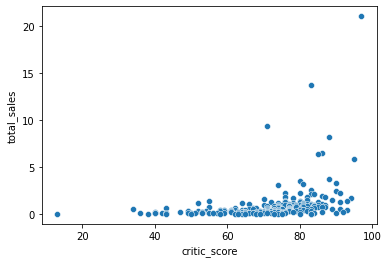

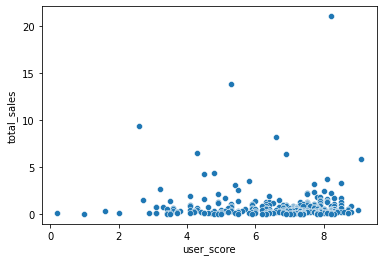

In [45]:
sns.scatterplot(data=ps3, x="critic_score", y="total_sales");
plt.show()
sns.scatterplot(data=ps3, x="user_score", y="total_sales")
plt.show()

Корреляция между продажами и рейтингами пользователей для PS3 очень слабая, а вот корреляция между продажами и рейтингом критиков уже чуть сильнее и составляет 0.33

**X360**

In [46]:
x360 = df_actual.query('platform == "X360"')
for entry in list_for_graph:
    correlation = x360['total_sales'].corr(x360[entry])
    print(f'Корреляция между total_sales и {entry} для Xbox 360 составляет: {correlation:0.2}')

Корреляция между total_sales и user_score для Xbox 360 составляет: 0.0062
Корреляция между total_sales и critic_score для Xbox 360 составляет: 0.36


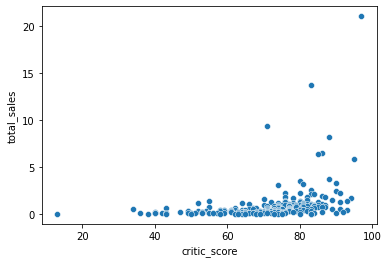

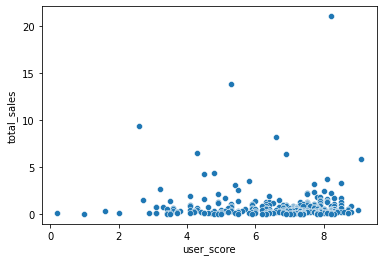

In [47]:
sns.scatterplot(data=ps3, x="critic_score", y="total_sales");
plt.show()
sns.scatterplot(data=ps3, x="user_score", y="total_sales")
plt.show()

Ситуация аналогична как в случае с PS3. Корреляция между продажами и рейтингом пользователей очень слабая, а для рейтинга критиков слегка сильнее.

**Xbox One**

In [48]:
list_for_graph = ['user_score','critic_score']

for entry in list_for_graph:
    correlation = XOne['total_sales'].corr(XOne[entry])
    print(f'Корреляция между total_sales и {entry} составляет: {correlation:0.2}')

Корреляция между total_sales и user_score составляет: -0.069
Корреляция между total_sales и critic_score составляет: 0.42


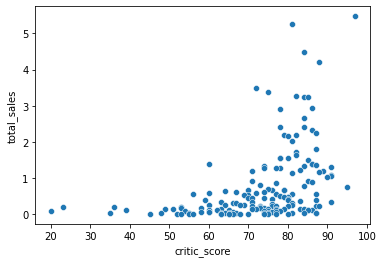

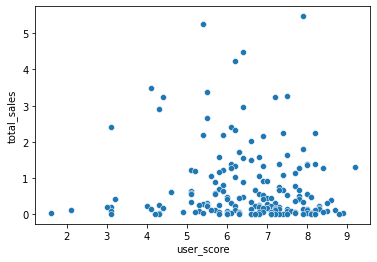

In [49]:
sns.scatterplot(data=XOne, x="critic_score", y="total_sales");
plt.show()
sns.scatterplot(data=XOne, x="user_score", y="total_sales")
plt.show()

**Вывод**
<br />
Корреляционный анализ показал, что между продажами и рейтингами пользователей слабая связь, которая очень незначительно влияет на продажи. 
<br />
Связь между продажами и рейтингом критиков слегка сильнее, но все равно рейтинги критиков не играют существенной в роли в продажах.

### Жанры

In [50]:
genre = df_actual.pivot_table(index=['genre'],
values='total_sales',
aggfunc='median').reset_index().sort_values(by='total_sales',ascending=False)

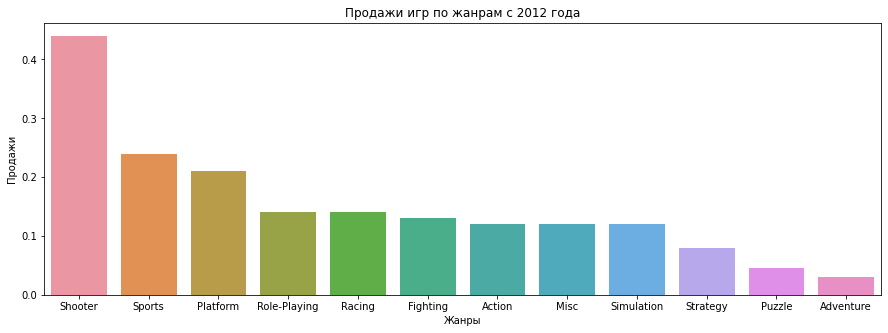

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(data = genre, x='genre',y='total_sales');
plt.title('Продажи игр по жанрам с 2012 года');
plt.xlabel('Жанры');
plt.ylabel('Продажи')
plt.show()

Самый прибыльный жанр - Shooter. На втором месте Sports. Думаю, популярность шутеров связано с неким соревновательным аспектом. Не зря же устраивают турниры по шутерам с огромным призовым фондом.
<br />
Самые низкие продажи у игр с жанрами: пазл, приключения. На мой взгляд все верно. Подобные игры интересны меньшему кругу лиц, чем "стрелялки" и спорт.


### Регионы

**Самые популярные платформы по регионам**

In [52]:
NA = df_actual.pivot_table(index=['platform'],
values='NA_sales',
aggfunc='sum').reset_index().sort_values(by='NA_sales',ascending=False)

genre_NA = df_actual.pivot_table(index=['genre'],
values='NA_sales',
aggfunc='sum').reset_index().sort_values(by='NA_sales',ascending=False)

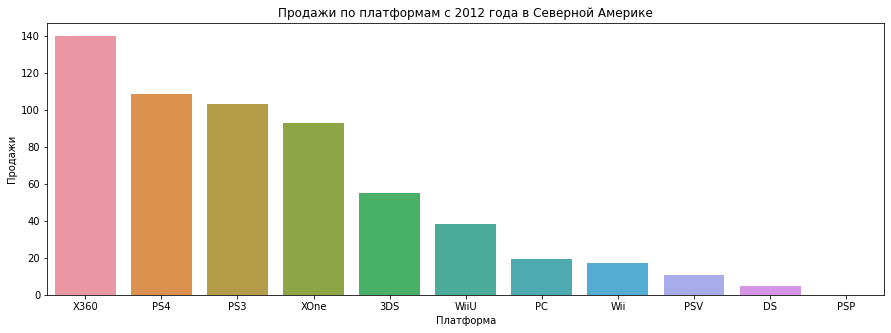

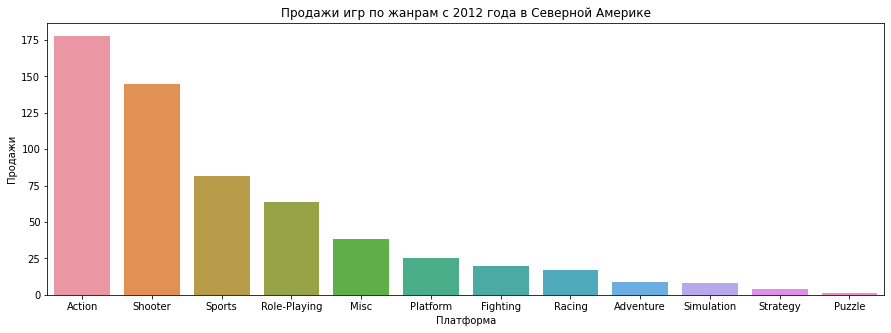

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(data = NA, x='platform',y='NA_sales',ci=None);
plt.title('Продажи по платформам с 2012 года в Северной Америке');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
#Сразу посмотрим продажи по жанрам
plt.figure(figsize=(15,5))
sns.barplot(data = genre_NA, x='genre',y='NA_sales',ci=None);
plt.title('Продажи игр по жанрам с 2012 года в Северной Америке');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
plt.show()

В Северной Америке топ 5 платформ занимают:
1. Xbox 360  
2. PS4
3. PS3
4. Xbox One
5. 3DS 
>
Различия в продажа небольшие. Единственное можно отметить явного лидера Xbox 360.

>топ 5 жанров:
1. Action  
2. Shooter
3. Sports
4. Role-Playing
5. Misc
> 
Первые 2 места занимают игры с самой большой аудиторией по интересам. Также в играх данных категорий постоянно проводят турниры, поэтому у них такая большая аудитория поклонников.

In [54]:
EU = df_actual.pivot_table(index=['platform'],
values='EU_sales',
aggfunc='sum').reset_index().sort_values(by='EU_sales',ascending=False)

genre_EU = df_actual.pivot_table(index=['genre'],
values='EU_sales',
aggfunc='sum').reset_index().sort_values(by='EU_sales',ascending=False)

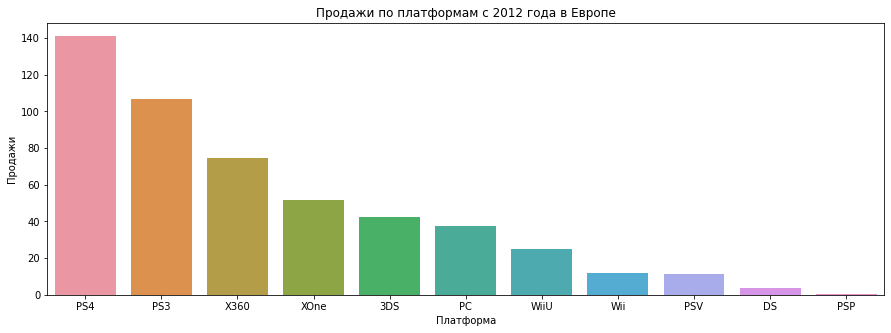

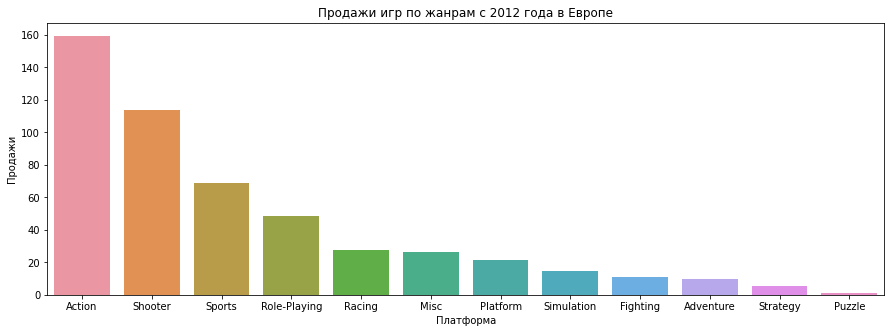

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(data = EU, x='platform',y='EU_sales',ci=None);
plt.title('Продажи по платформам с 2012 года в Европе');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
#Сразу посмотрим продажи по жанрам
plt.figure(figsize=(15,5))
sns.barplot(data = genre_EU, x='genre',y='EU_sales',ci=None);
plt.title('Продажи игр по жанрам с 2012 года в Европе');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
plt.show()

Ситуация с популярными жанрами игр аналогичная как и в Северной Америке.
> 
Топ 5 популярных платформ в Европе:
1. PS4  
2. PS3
3. Xbox 360
4. Xbox One
5. 3DS
> 
Лидируют платформы компании Sony. Следом за ними сразу идут платформы компании Microsoft. PS4 и PS3 занимают первые места по продажам из-за эксклюзивных игр.





In [56]:
JP = df_actual.pivot_table(index=['platform'],
values='JP_sales',
aggfunc='sum').reset_index().sort_values(by='JP_sales',ascending=False)

genre_JP = df_actual.pivot_table(index=['genre'],
values='JP_sales',
aggfunc='sum').reset_index().sort_values(by='JP_sales',ascending=False)

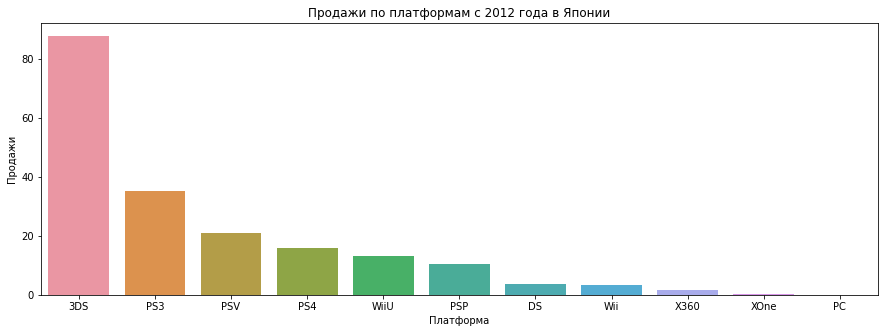

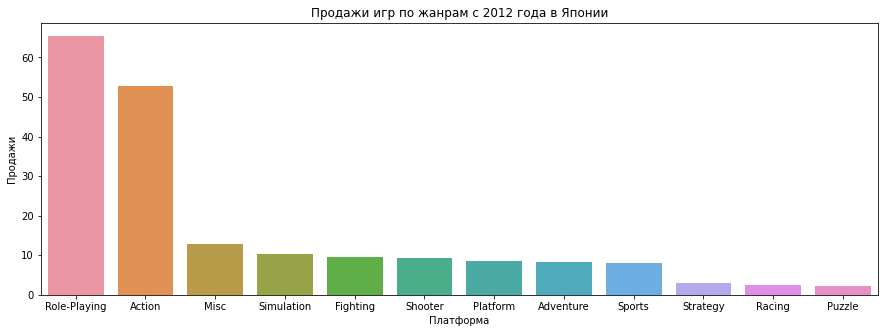

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(data = JP, x='platform',y='JP_sales',ci=None);
plt.title('Продажи по платформам с 2012 года в Японии');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
#Сразу посмотрим продажи по жанрам
plt.figure(figsize=(15,5))
sns.barplot(data = genre_JP, x='genre',y='JP_sales',ci=None);
plt.title('Продажи игр по жанрам с 2012 года в Японии');
plt.xlabel('Платформа');
plt.ylabel('Продажи')
plt.show()

В Японии лидер платформ - 3DS, причем с большим отрывом. Топ 5 платформ по продажам в Японии:
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU
>
Nintendo 3DS занимает лидирующую позицию по продажам в Японии, потому что компания Nintendo основана в Японии. К тому же именно на Nintendo вышла легендарная, которая так любима японцами, а именно The Legend of Zelda. 
> 
Топ 5 популярных жанров в Японии:
1. Ролевые игры  
2. Экш-игры  
3. Разное
4. Симуляторы
5. Драки
>
Самые популярный жанр игр в Японии - ролевые игры. Мои исследования объясняют почему ролевые игры так популярны в Японии. Все дело в том, что почти все ролевые игры сделаны в Японии и направленны на японскую аудиторию.





In [58]:
df_actual['rating'] = df_actual['rating'].fillna('tdb')

/tmp/ipykernel_109/1817439660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['rating'] = df_actual['rating'].fillna('tdb')


In [59]:
NA_rt = df_actual[['NA_sales','rating']]
EU_rt = df_actual[['EU_sales','rating']]
JP_rt = df_actual[['JP_sales','rating']]

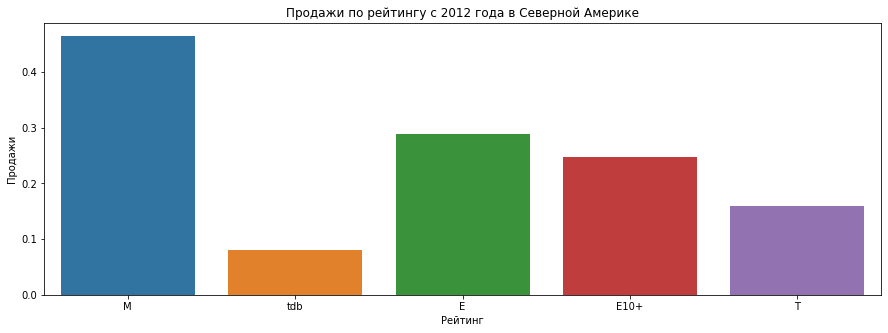

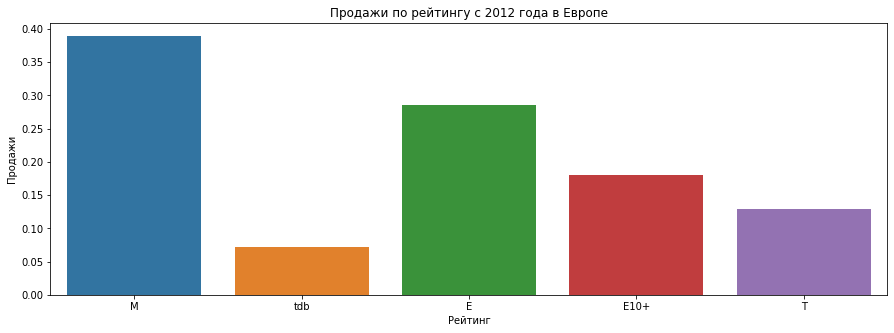

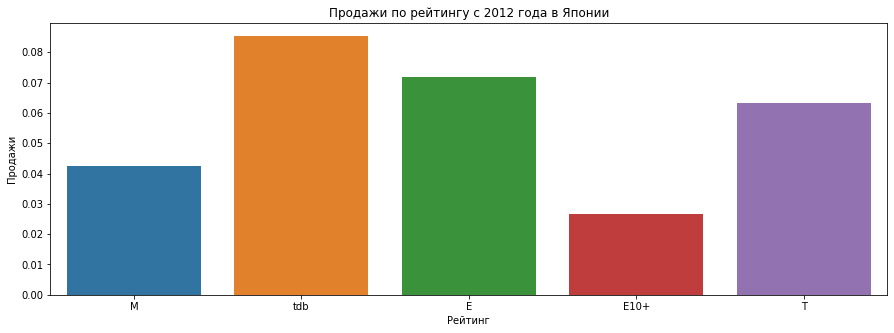

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(data = NA_rt, x='rating',y='NA_sales',ci=None);
plt.title('Продажи по рейтингу с 2012 года в Северной Америке');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи')

plt.figure(figsize=(15,5))
sns.barplot(data = EU_rt, x='rating',y='EU_sales',ci=None);
plt.title('Продажи по рейтингу с 2012 года в Европе');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи')

plt.figure(figsize=(15,5))
sns.barplot(data = JP_rt, x='rating',y='JP_sales',ci=None);
plt.title('Продажи по рейтингу с 2012 года в Японии');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи')
plt.show()

Рейтинг ERSB не влияет на продажи игр. Поскольку основной контингент, которые играют в игры стартует в 17 лет, то и большинство игр рассчитаны для этих людей, поэтому в Северной Америке и Европе самые большие продажи рейтинга M (подходит для лиц старше 17 лет). Рейтинг M как раз таки получают экшн-игры и шутеры.
<br />
Самые продаваемые игры в Японии -  игры без рейтинга, а второе место занимает рейтинг Е - Подходит для всех возрастных категорий. Как раз таки ролевые игры получают данный рейтинг, а исследования показывают, что самый популярный рейтинг игр в Японии - ролевые, поэтому такие большие продажи у категории Е.
<br />
Такое большое количество игр без рейтинга легко объяснить. В Японии очень серьезная политика оценки игр и если игра не проходит под требования, то ее не выпускают на рынок, поэтому легче не ставить рейтинг, чтобы была хоть какая-то возможность показать игру японской аудитории.

## Проверка гипотез

Нулевые гипотезы H_0:  

*   Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
*   Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

> Alpha = .05

Альтернативные гипотезы H_1:
*   Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые
*   Средние пользовательские рейтинги жанров Action  и Sports различаются.


Гипотеза Xbox One и PC

In [61]:
alpha = 0.05
results = st.ttest_ind(df_actual[df_actual['platform'] == 'XOne']['user_score'],\
                       df_actual[df_actual['platform'] == 'PC']['user_score'],\
                       equal_var = False,nan_policy='omit')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 0.5489537965134987
Не можем отвергнуть нулевую гипотезу.


В итоге, мы не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [62]:
alpha = 0.05
results = st.ttest_ind(df_actual[df_actual['genre'] == 'Action']['user_score'],\
                       df_actual[df_actual['genre'] == 'Sports']['user_score'],\
                       equal_var = False,nan_policy='omit')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу.


Не удалось опровергнуть нулевую гипотезу. Принимаем альтернативную. Средние пользовательски рейтинги Action и Sports различаются

## Вывод 
Итоги предобработки данных:
* Название столбцов приведены к нижнему регистру (кроме EU_sales, JP_sales, NA_sales)
* Изменены типы данных в столбцах: year_of_release, critic_score, user_score.
* Добавлен столбец с суммарным количеством продаж по всем регионам (total_sales)
* Произведена работа с пропусками
* В столбце user_score оценка 'tbd' была заменена на nan
* Выполнены проверки с последующим удалением явных и неявных дубликатов.
<br />
Данные не сильно повреждены, но нужна была предобработка, чтобы дальнейшие исследование соотвествовало истине.
<br />
<br /> Итоги исследовательского анализа:
* Наиболее перспективными платформами являются PS4 и Xbox One
* Рейтинги критиков и пользователей влияют на общие продажи незначительно.
* Самый продоваемый жанр - Shooter
* Самые лояльные страны для запуска рекламной кампании: Северная Америка, Европа
* Наиболее продаваемый рейтинг в Северной Америке и Европе - М (от 17 лет)
<br />
<br />
Исходя из проверки гипотез можно предположить, что средние пользовательские рейтинги платформ примерно равны, а средние пользовательские рейтинги жанров различаются.